In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy.stats as stats
import pandas as pd

In [3]:
data_source = "data/Results_all.csv"
trial_index = 0
iteration_index = 5
loss_index = 6
tests = {1:"Amplitude X", 2:"Amplitude Y", 3:"Amplitude Z", 
         4: "RX X F", 5: "RX Y F", 6: "RX Z F", 7: "RX X T", 8: "RX Y T", 9: "RX Z T",
         10: "RY X F", 11: "RY Y F", 12: "RY Z F", 13: "RY X T", 14: "RY Y T", 15: "RY Z T",
         16: "RZ X F", 17: "RZ Y F", 18: "RZ Z F", 19: "RZ X T", 20: "RZ Y T", 21: "RZ Z T",
         22: "Paper Rot X", 23: "Paper Rot Y", 24: "Paper Rot Z",
         25: "Rot3 X", 26: "Rot3 Y", 27: "Rot3 Z"}

with open(data_source, newline="") as csvfile:
    reader = csv.reader(csvfile)
    dict_results = {}
    iteration = []
    loss = []
    trial = 0
    # For each line, I need the Observable + Embedding + Embedding Type + Entangled
    # for the legend. I could also just use the trial number.
    # For the data, I need iteration for the x-axis and cost (loss) for the y-axis.
    for row in reader:
        #print(row[trial_index], trial)
        # Skip the headers row.
        if trial == 0:
            trial = 1
            continue
            
        # starting a new trial
        if int(row[trial_index]) != trial:
            dict_results[trial] = (iteration, loss)
            print(tests[trial], min(loss))
            iteration = []
            loss = []
            trial += 1
        
        # Start gathering the data.
        iteration.append(int(row[iteration_index]))
        loss.append(float(row[loss_index]))
        
    # Don't forget the last trial
    dict_results[trial] = (iteration, loss)
    print(tests[trial], min(loss))

Amplitude X 0.412704672
Amplitude Y 0.416149562
Amplitude Z 0.39080092
RX X F 0.017770887
RX Y F 0.020544681
RX Z F 0.022853355
RX X T 0.041080373
RX Y T 0.027738395
RX Z T 0.031231935
RY X F 0.027579843
RY Y F 0.017920422
RY Z F 0.023460181
RY X T 0.02278711
RY Y T 0.027658069
RY Z T 0.038555734
RZ X F 1.000000528
RZ Y F 1.000002857
RZ Z F 1.000047637
RZ X T 1.000001337
RZ Y T 1.000001579
RZ Z T 1.000044703
Paper Rot X 0.089604979
Paper Rot Y 0.083495118
Paper Rot Z 0.106183471
Rot3 X 0.095406769
Rot3 Y 0.10011036
Rot3 Z 0.095552483


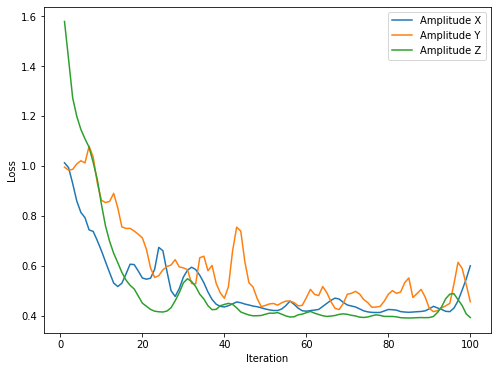

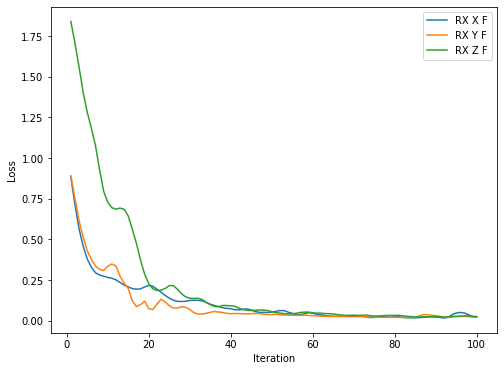

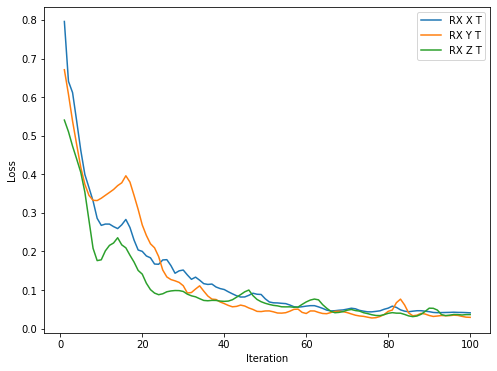

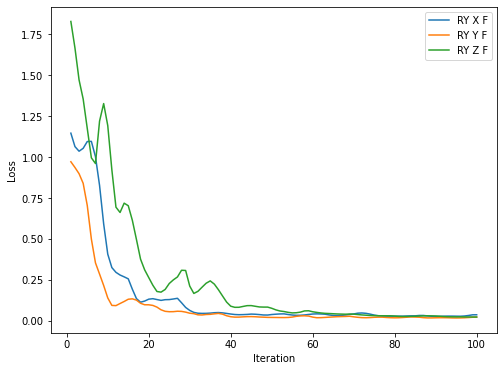

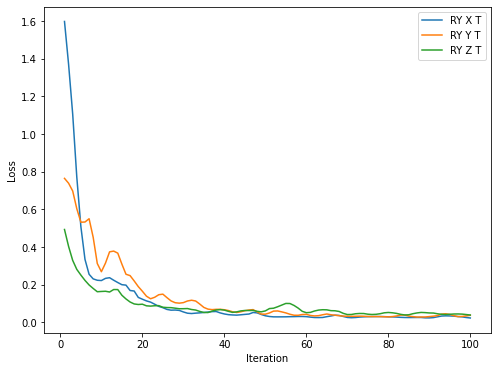

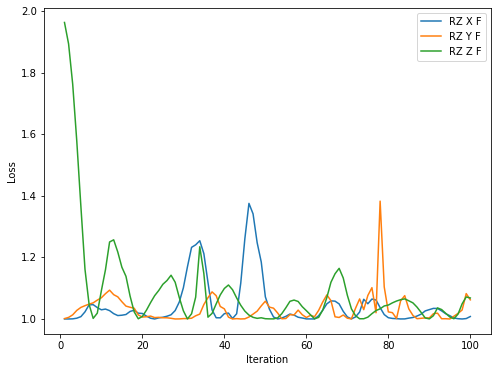

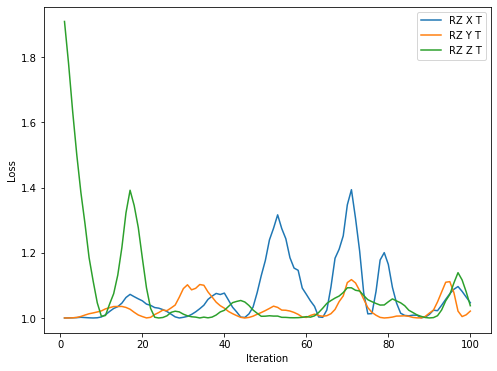

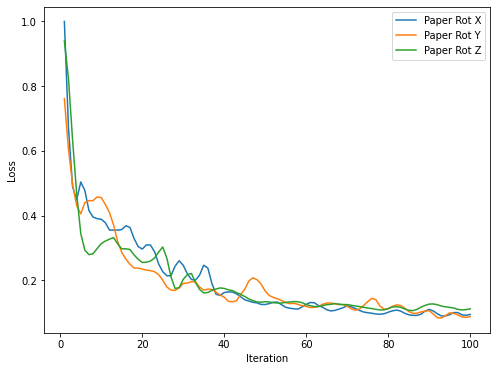

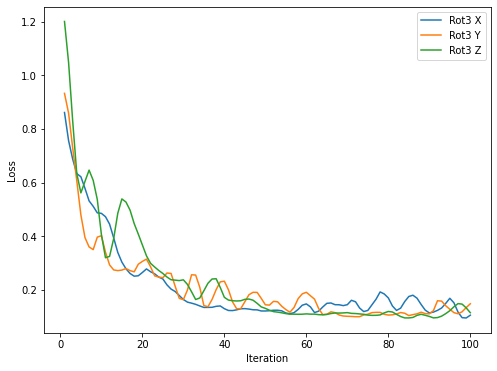

In [5]:
fig_x = 8
fig_y = 6

for i in range(9):
    plt.figure(figsize=(fig_x, fig_y))
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    
    for j in range(3):
        trial = i * 3 + j + 1
        plt.plot(dict_results[trial][0], dict_results[trial][1], label=tests[trial])

    plt.legend()
    plt.show()

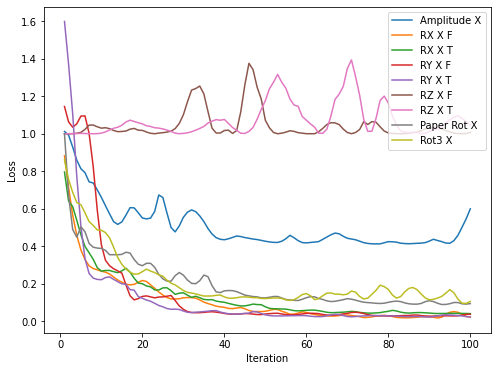

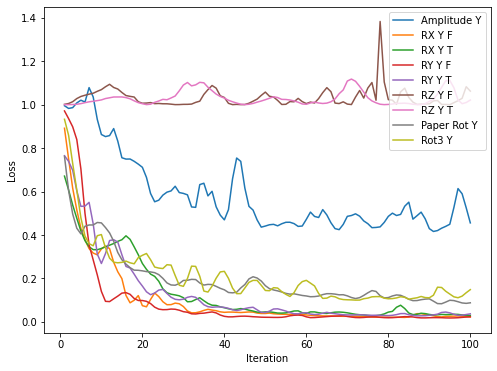

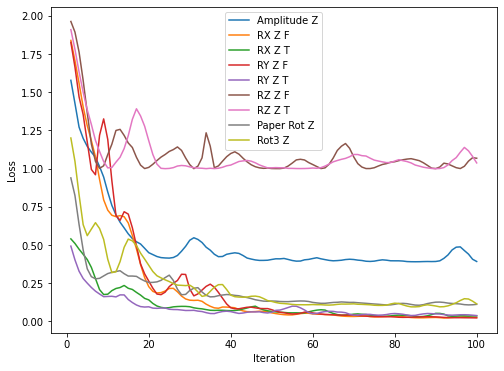

In [6]:
for i in range(3):
    plt.figure(figsize=(fig_x, fig_y))
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    # 0 => 1, 4, 7, 10, 13, 16, 19, 22
    
    for j in range(9):
        trial = i + 3 * j + 1
        plt.plot(dict_results[trial][0], dict_results[trial][1], label=tests[trial])

    plt.legend()
    plt.show()

In [8]:
#tests = {1:"Amplitude X", 2:"Amplitude Y", 3:"Amplitude Z", 
#         4: "RX X F", 5: "RX Y F", 6: "RX Z F", 7: "RX X T", 8: "RX Y T", 9: "RX Z T",
#         10: "RY X F", 11: "RY Y F", 12: "RY Z F", 13: "RY X T", 14: "RY Y T", 15: "RY Z T",
#         16: "RZ X F", 17: "RZ Y F", 18: "RZ Z F", 19: "RZ X T", 20: "RZ Y T", 21: "RZ Z T",
#         22: "Paper Rot X", 23: "Paper Rot Y", 24: "Paper Rot Z"}

p_values = []

for i in range(9):
    a = i * 3 + 1
    b = i * 3 + 2
    c = i * 3 + 3
    list_a = dict_results[a][1]
    list_b = dict_results[b][1]
    list_c = dict_results[c][1]
    test_a = tests[a]
    test_b = tests[b]
    test_c = tests[c]
    
    p_values.append(test_a + " " + test_b + " " + str(stats.ttest_ind(list_a, list_b)[1]))
    p_values.append(test_b + " " + test_c + " " + str(stats.ttest_ind(list_b, list_c)[1]))
    p_values.append(test_c + " " + test_a + " " + str(stats.ttest_ind(list_c, list_a)[1]))
    
#print(*p_values, sep='\n')

In [10]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# dict_results[trial] = (iteration, loss)
# print(tests[trial], min(loss))

#for key in dict_results:
#    print(tests[key], dict_results[key][1][-1])
    
# Encoding strategy, measurement basis, loss
regression_data = []
bases = ['X', 'Y', 'Z']
#bases = [1, 2, 3]
embeddings = ["Amplitude", "RXF", "RXT", "RYF", "RYT", "RZF", "RZT", "PapRot", "Rot3"]
#embeddings = [1, 2, 3, 4, 5, 6, 7, 8]
for trial in dict_results:
    regression_data.append([embeddings[(trial - 1) // 3], bases[(trial - 1) % 3], dict_results[trial][1][-1]])
    
df = pd.DataFrame(regression_data, columns=["Encoding", "Meas", "Loss"])
enc = OneHotEncoder(sparse=False)
display(df.head())

#display(df[["Loss"]] / df[["Loss"]].max())
#df[["Loss"]] = df[["Loss"]] / df[["Loss"]].max()
display(df.head())
#df[["Loss"]] = StandardScaler().fit_transform(df[["Loss"]])
#display(df)

X = df[["Encoding", "Meas"]]
X_transform = enc.fit_transform(X)
y = df["Loss"]

one_hot = pd.get_dummies(df["Encoding"]).join(pd.get_dummies(df["Meas"]))
#one_hot.head()
X2 = one_hot

print(df.corr())

,Encoding,Meas,Loss
0,Amplitude,X,0.599779
1,Amplitude,Y,0.455663
2,Amplitude,Z,0.392596
3,RXF,X,0.022231
4,RXF,Y,0.022338


,Encoding,Meas,Loss
0,Amplitude,X,0.599779
1,Amplitude,Y,0.455663
2,Amplitude,Z,0.392596
3,RXF,X,0.022231
4,RXF,Y,0.022338


      Loss
Loss   1.0


In [13]:
import statsmodels.api as sm
regr = linear_model.LinearRegression(fit_intercept=True)
#fit_model = regr.fit(X, y)
#print(fit_model.score(X, y))
#print(dir(regr))
#print(regr.get_params())
#for i, j in zip(df.columns, regr.coef_):
#    print(i, j)
#print("Mean squared error: %f" % np.mean((regr.predict(X) - y) ** 2))
#print()

regr = linear_model.LinearRegression(fit_intercept=False)
fit_model = regr.fit(X2, y)
print(fit_model.score(X2, y))
#print(regr)
print()
for i, j in zip(X2.columns, regr.coef_):
    print(i, j)
print("Mean squared error: %f" % np.mean((regr.predict(X2) - y) ** 2))

est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
cov_params = est2.cov_params()
print(est2.cov_params())

0.9942540153002412

Amplitude 0.24054931733333335
PapRot -0.14408498233333294
RXF -0.2182898843333335
RXT -0.20646364233333345
RYF -0.2139514513333332
RYT -0.20938356500000013
RZF 0.8039977826666668
RZT 0.7930737183333333
Rot3 -0.11905843399999985
X 0.2502060296666667
Y 0.2401024886666665
Z 0.2360803406666666
Mean squared error: 0.000957
                            OLS Regression Results                            
Dep. Variable:                   Loss   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     276.9
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           5.76e-16
Time:                        11:18:08   Log-Likelihood:                 55.542
No. Observations:                  27   AIC:                            -89.08
Df Residuals:                      16   BIC:                            -74.83
Df Model:                   

In [35]:
#cx = 0.2642
#cy = 0.2475
cx = 0.2502
cy = 0.2401
cz = 0.2361
#cz = 0.2471
std_err = 0.014
def z_test(c1, c2, err):
    return ((c1 - c2) / err)

#print(z_test(cx, cy, std_err))
#print(z_test(cy, cz, std_err))
#print(z_test(cz, cx, std_err))

std_err_diff = np.sqrt(2*0.000153 - 2*(-0.000026))
d1 = cx - cy
d2 = cy - cz
d3 = cx - cz
print(d1 / std_err_diff)
print(d2 / std_err_diff)
print(d3 / std_err_diff)

#print(est2.params)

0.5338015868075052
0.21140656903267618
0.7452081558401814


In [50]:
from itertools import combinations
#cov_params["Amplitude"]["Amplitude"]
# var needs to be from one of these two lists:
# bases = ['X', 'Y', 'Z']
# embeddings = ["Amplitude", "RXF", "RXT", "RYF", "RYT", "RZF", "RZT", "PapRot", "Rot3"]
def wald_test(var1, var2):
    # Get the difference in the weights between the two variables
    weight_diff = est2.params[var1] - est2.params[var2]
    # Get the variance and co-variance between the two variables
    variance = cov_params[var1][var1] + cov_params[var2][var2]
    covariance = cov_params[var1][var2]
    result = weight_diff / np.sqrt(variance - 2 * covariance)
    return result

wald_test("X", "Y")
#print(list(combinations(bases, 2)))
#print(list(combinations(embeddings, 2)))
basis_pairs = combinations(bases, 2)
embedding_pairs = combinations(embeddings, 2)

for pair in basis_pairs:
    print(pair[0], pair[1], wald_test(pair[0], pair[1]))
    
results = []
for pair in embedding_pairs:
    result = wald_test(pair[0], pair[1])
    #print(pair[0], pair[1], wald_test(pair[0], pair[1]))
    results.append((pair[0], pair[1], result))
    
print()
print("No statistical differences:")
for result in results:
    if result[2] < 2 and result[2] > -2:
        print(result[0], result[1], result[2])

print()
print("Statistical differences:")
for result in results:
    if result[2] >= 2 or result[2] <= -2:
        print(result[0], result[1], result[2])

X Y 0.5334418147857758
X Z 0.7458012171435106
Y Z 0.21235940235773498

No statistical differences:
RXF RXT -0.360495279158201
RXF RYF -0.13224696530345104
RXF RYT -0.2714882778774667
RXT RYF 0.22824831385475003
RXT RYT 0.0890070012807343
RXT PapRot -1.9014673004505476
RYF RYT -0.13924131257401565
RYT PapRot -1.9904743017312823
RZF RZT 0.3329945067407644
PapRot Rot3 -0.7628756901635502

Statistical differences:
Amplitude RXF 13.986638028678295
Amplitude RXT 13.626142749520094
Amplitude RYF 13.854391063374843
Amplitude RYT 13.715149750800828
Amplitude RZF -17.17540633800675
Amplitude RZT -16.84241183126598
Amplitude PapRot 11.724675449069542
Amplitude Rot3 10.961799758905997
RXF RZF -31.16204436668505
RXF RZT -30.82904985994427
RXF PapRot -2.2619625796087486
RXF Rot3 -3.0248382697722995
RXT RZF -30.801549087526833
RXT RZT -30.468554580786055
RXT Rot3 -2.664342990614098
RYF RZF -31.029797401381586
RYF RZT -30.696802894640815
RYF PapRot -2.1297156143052973
RYF Rot3 -2.892591304468849
RYT R